In [2]:
pip install snscrape

     -------------------------------------- 71.8/71.8 kB 564.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install swifter

     ------------------------------------ 830.9/830.9 kB 293.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16300 sha256=fb80247c42501062cd3ec7a579fd6030825dbc555ed708b25c5d46add3dfeffc
  Stored in directory: c:\users\matrix computer\appdata\local\pip\cache\wheels\2b\5e\f2\3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter
Note: you may need to restart the kernel to use updated packages.


In [9]:
import snscrape.modules.twitter as sntwitter
import pandas as pd 
import numpy as np

TWEET_DATA = pd.read_csv("AniesData.csv")

TWEET_DATA.head()

,Datetime,Tweet ID,Text,Username,Label
0,2022-12-13 23:34:02+00:00,1602809099346796544,@republikaonline Love pa Anies my dream presiden,BenyFitri,1
1,2022-12-13 14:50:01+00:00,1602677225660502022,Anies tukang tipu tdk bakalan jadi Presiden. B...,Omkaroll1,1
2,2022-12-13 14:48:21+00:00,1602676806016176128,Anies tukang tipu tdk bakalan jadi Presiden. B...,Omkaroll1,1
3,2022-12-13 12:13:35+00:00,1602637858245861376,@budiwidagdo2 @BosPurwa Wajahnya pada melas se...,Suprapt20545142,1
4,2022-12-13 08:00:54+00:00,1602574268826800128,"Iyq bener banget, setelah dr jakarta, sekarang...",Aryabinya2F,1


In [10]:
TWEET_DATA['Text'] = TWEET_DATA['Text'].str.lower()


print('Case Folding Result : \n')
print(TWEET_DATA.head(5))
print('\n\n\n')


Case Folding Result : 

                    Datetime             Tweet ID  \
0  2022-12-13 23:34:02+00:00  1602809099346796544   
1  2022-12-13 14:50:01+00:00  1602677225660502022   
2  2022-12-13 14:48:21+00:00  1602676806016176128   
3  2022-12-13 12:13:35+00:00  1602637858245861376   
4  2022-12-13 08:00:54+00:00  1602574268826800128   

                                                Text         Username  Label  
0   @republikaonline love pa anies my dream presiden        BenyFitri      1  
1  anies tukang tipu tdk bakalan jadi presiden. b...        Omkaroll1      1  
2  anies tukang tipu tdk bakalan jadi presiden. b...        Omkaroll1      1  
3  @budiwidagdo2 @bospurwa wajahnya pada melas se...  Suprapt20545142      1  
4  iyq bener banget, setelah dr jakarta, sekarang...      Aryabinya2F      1  






In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\MATRIX
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#TOKENIZING

import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist


def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TWEET_DATA['tweet_tokens'] = TWEET_DATA['Text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(TWEET_DATA['tweet_tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0               [love, pa, anies, my, dream, presiden]
1    [anies, tukang, tipu, tdk, bakalan, jadi, pres...
2    [anies, tukang, tipu, tdk, bakalan, jadi, pres...
3    [wajahnya, pada, melas, semua, karena, junjung...
4    [iyq, bener, banget, setelah, dr, jakarta, sek...
Name: tweet_tokens, dtype: object






In [23]:
#STOPWORD REMOVAL

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("kinerja-dompu.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0])
#list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['tweet_tokens_WSW'] = TWEET_DATA['tweet_tokens'].apply(stopwords_removal) 


print(TWEET_DATA['tweet_tokens_WSW'].head())

0    [komisi, pemilihan, kabupaten, dompu, penandat...
1    [rabu, luhkan, dompunurlaili, mengikuti, zoome...
2    [pasca, dugaan, pemulangan, paksa, pasien, kin...
3    [raih, penghargaan, kpai, kinerja, pemda, dpa,...
4    [berhasil, deklarasikan, pilar, stbm, kinerja,...
Name: tweet_tokens_WSW, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#NORMALIZATION
normalizad_word = pd.read_csv("AniesData.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TWEET_DATA['tweet_normalized'] = TWEET_DATA['tweet_tokens_WSW'].apply(normalized_term)

TWEET_DATA['tweet_normalized'].head(10)

KeyError: 'tweet_tokens_WSW'

In [25]:
#STEMMING

# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TWEET_DATA['tweet_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['tweet_tokens_stemmed'] = TWEET_DATA['tweet_normalized'].swifter.apply(get_stemmed_term)
print(TWEET_DATA['tweet_tokens_stemmed'].head(10))


889
------------------------
komisi : komisi
pemilihan : pilih
kabupaten : kabupaten
dompu : dompu
penandatanganan : penandatanganan
perjanjian : janji
kinerja : kerja
bertempat : tempat
ruang : ruang
aula : aula
kpu : kpu
jumat : jumat
rabu : rabu
luhkan : luhkan
dompunurlaili : dompunurlaili
mengikuti : ikut
zoometing : zoometing
pembinaan : bina
realisasi : realisasi
iku : iku
penyuluh : suluh
perikanan : ikan
bbrblpp : bbrblpp
gondol : gondol
pasca : pasca
dugaan : duga
pemulangan : pulang
paksa : paksa
pasien : pasien
oknum : oknum
dokter : dokter
rsu : rsu
dihujani : hujan
sorotan : sorot
raih : raih
penghargaan : harga
kpai : kpai
pemda : pemda
dpa : dpa
dompudiapresiasi : dompudiapresiasi
berhasil : hasil
deklarasikan : deklarasi
pilar : pilar
stbm : stbm
diapresiasi : apresiasi
gubernurntb : gubernurntb
ganjar : ganjar
pranowo : pranowo
digeruduk : digeruduk
pendemo : demo
bukaan : buka
puluhan : puluh
kades : kades
kab : kab
ntb : ntb
sengaja : sengaja
kunker : kunker
rudin :

electoral : electoral
studies : studies
esp : esp
bali : bal
jambore : jambore
posyandu : posyandu
sehat : sehat
com : com
award : award
terbaik : baik
dki : dki
berhak : hak
memantau : pantau
setuju : tuju
bos : bos
bobrok : bobrok
kek : kek
gini : gin
dbanggain : dbanggain
ma : ma
bang : bang
jali : jali
sby : sby
stabil : stabil
penambahan : tambah
utang : utang
kemiskinan : miskin
tingkat : tingkat
penangguran : penangguran
lahhhh : lahhhh
haean : haean
emang : emang
lu : lu
kudet : kudet
jokowi : jokowi
terhipnotis : hipnotis
bualan : bual
asbun : asbun
hoaks : hoaks
gerombolan : gerombol
sebelah : belah
hahaha : hahaha
diundang : undang
istana : istana
hadiah : hadiah
sepeda : sepeda
merekahmmmm : merekahmmmm
contoloyo : contoloyo
dandim : dandim
danramil : danramil
babinsa : babinsa
apkowil : apkowil
korem : korem
wira : wira
bhakti : bhakti
kabapas : kabapas
msaleh : msaleh
pos : pos
bapas : bapas
mengevaluasi : evaluasi
penguatan : kuat
tusi : tus
pk : pk
abh : abh
pembuatan :

Pandas Apply:   0%|          | 0/157 [00:00<?, ?it/s]

0    [komisi, pilih, kabupaten, dompu, penandatanga...
1    [rabu, luhkan, dompunurlaili, ikut, zoometing,...
2    [pasca, duga, pulang, paksa, pasien, kerja, ok...
3    [raih, harga, kpai, kerja, pemda, dpa, dompudi...
4    [hasil, deklarasi, pilar, stbm, kerja, pemda, ...
5    [ganjar, pranowo, digeruduk, demo, buka, puluh...
6    [diskusi, sasak, samawa, bima, dompu, agustus,...
7    [jumat, tim, evaluasi, bappenda, ntb, evaluasi...
8    [kota, bima, kakanim, bima, hadir, undang, kon...
9    [visite, sehat, harap, mantik, lapas, dompu, s...
Name: tweet_tokens_stemmed, dtype: object


In [26]:
TWEET_DATA.to_excel("KinerjaDompuPreprocessing.xlsx")

In [105]:
TWEET_DATA.to_excel("Data Gubernur NTB/RKPreprocessing.xlsx")

In [1]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_excel('Dataset_NTB/Dataset_NTB/IrwansyahLabelling.xlsx')

In [3]:
def convert(polarity):
    if polarity == 'POSITIVE':
        return 1
    elif polarity == 'NEGATIVE':
        return 0

In [4]:
df['Polarity'] = df['label'].apply(convert)

In [5]:
X = df['tweet_tokens_stemmed']
y = df['Polarity']

In [8]:
bow_transformer = CountVectorizer()
print(df['Text'].shape)
#X = bow_transformer.fit_transform(df['text'])
X = bow_transformer.fit_transform(df['tweet_tokens_stemmed'].values.astype('U'))

print(X.toarray())
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurances:', X.nnz)

filename1 = 'CountVectorizedAnies.csv'
pickle.dump(bow_transformer, open(filename1, 'wb'))

tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape)

filename2 = 'TfidfAnies.csv'
pickle.dump(tf_transform, open(filename1, 'wb'))

(3,)
[[0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0]]
Shape of Sparse Matrix:  (3, 18)
Amount of Non-Zero occurances: 33
(3, 18)


In [9]:
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: ',format(density))


Density:  61.111111111111114


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10)

In [23]:
print(X_train)

  (0, 0)	0.2581988897471611
  (0, 1)	0.2581988897471611
  (0, 2)	0.2581988897471611
  (0, 3)	0.2581988897471611
  (0, 4)	0.2581988897471611
  (0, 5)	0.2581988897471611
  (0, 6)	0.2581988897471611
  (0, 7)	0.2581988897471611
  (0, 8)	0.2581988897471611
  (0, 10)	0.2581988897471611
  (0, 12)	0.2581988897471611
  (0, 13)	0.2581988897471611
  (0, 14)	0.2581988897471611
  (0, 15)	0.2581988897471611
  (0, 16)	0.2581988897471611
  (1, 2)	0.2672612419124244
  (1, 3)	0.2672612419124244
  (1, 4)	0.2672612419124244
  (1, 5)	0.2672612419124244
  (1, 7)	0.2672612419124244
  (1, 8)	0.2672612419124244
  (1, 9)	0.2672612419124244
  (1, 10)	0.2672612419124244
  (1, 12)	0.2672612419124244
  (1, 13)	0.2672612419124244
  (1, 14)	0.2672612419124244
  (1, 15)	0.2672612419124244
  (1, 16)	0.2672612419124244
  (1, 17)	0.2672612419124244


In [24]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [25]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [174]:
print(preds[1])
#print(X_test[5])
print(y_test)
#print(X_train[5])
#print(y_train[6])

1
11    1
92    1
29    1
26    0
5     1
79    1
17    0
59    1
69    1
49    1
50    1
30    1
53    1
83    1
38    0
85    1
43    0
82    1
72    0
96    1
97    0
Name: Polarity, dtype: int64


In [175]:
from io import StringIO
classification = classification_report(y_test, preds)
s = StringIO(classification)
#with open('classification.csv', 'w') as f:
#    for line in s:
#        f.write(line)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
print(accuracy_score(y_test, preds))

0.7142857142857143


In [177]:
accuracy = accuracy_score(y_test, preds)
a = np.asarray([accuracy])
np.savetxt("Data Gubernur NTB/AkurasiAnies.xlsx", a, delimiter=",", fmt='%s')

In [178]:
Final = df[['Text', 'tweet_tokens_stemmed', 'label', 'Polarity']]

In [179]:
result_matrics = (confusion_matrix(y_test,preds))
print(result_matrics)

[[ 0  6]
 [ 0 15]]


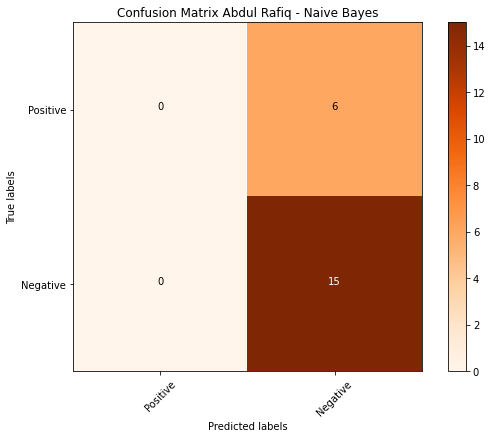

In [180]:
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion Matrix Abdul Rafiq - Naive Bayes', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()
    
    
    
target_names = ('Positive', 'Negative')
plot_confusion_matrix(result_matrics, target_names)

In [47]:
Final.to_excel('HasilAnies03.xlsx')

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
filename = 'ModelAnalisisAnies.csv'
pickle.dump(model, open(filename, 'wb'))

In [50]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.46153846153846156


In [51]:
X_test.shape

(13, 185)

In [52]:
y_train.shape

(28,)

In [53]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv = 10)
scores

array([-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -2. , -1. , -1. ])

In [54]:
print(np.mean(scores))

-0.7499999999999998


In [55]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model, X_test, y_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [57]:
scores_test = cross_val_score(model, X_test, y_test, cv =5)
scores_test

array([0.66666667, 0.66666667, 0.66666667, 0.5       , 0.5       ])

In [58]:
print(np.mean(scores_test))

0.6
